In [1]:
# Author : Shreyas Shashikant Vaishnav
# Purpose : Decision Tree
# Dataset : Fraud_Check_Dataset
# Question : Fraud Check Assessment

In [2]:
# Importing the basic Libraries for the DecisionTree 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
# Importing the data 

fraud = pd.read_csv(r"D:\Resume\Data Science\Assignments_SV\Data Science Assignment\Decision tree\Fraud_check.csv")

In [4]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
# working with 6 columns and 600 rows data 

fraud.shape

(600, 6)

In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [8]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


                 Taxable.Income  City.Population  Work.Experience
Taxable.Income         1.000000        -0.064387        -0.001818
City.Population       -0.064387         1.000000         0.013135
Work.Experience       -0.001818         0.013135         1.000000


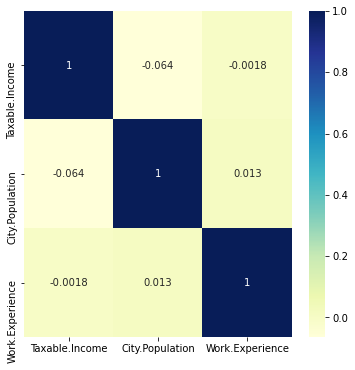

In [10]:
import seaborn as sns

print(fraud.corr())
# plotting correlation heatmap
fig, ax = plt.subplots(figsize=(6,6))
dataplot = sns.heatmap(fraud.corr(), cmap="YlGnBu", ax = ax, annot=True)
  
# displaying heatmap
plt.show()

In [10]:
# To get the basic idea of the data

fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [11]:
# Renaming the data columns in shorter names for the conveninece

fraud.rename({'Undergrad':'UG','Marital.Status':'MS', 'Taxable.Income':'TI', 'City.Population':'CP', 'Work.Experience':'WE'},axis = 1, inplace = True)

In [12]:
fraud.head()

,UG,MS,TI,CP,WE,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [13]:
# Categorizing the tax column based on the taxable income condition using lambda function with map method i.e labeling manually

fraud['TI'] = fraud.TI.map(lambda taxable_income : 'Risky' if taxable_income <= 30000 else 'Good')

In [14]:
# Converting the data columns into the categorical datatypes

fraud['UG'] = fraud['UG'].astype("category")
fraud['MS'] = fraud['MS'].astype("category")
fraud['Urban'] = fraud['Urban'].astype("category")
fraud['TI'] = fraud['TI'].astype("category")

In [15]:
# Getting the datatypes of the data

fraud.dtypes

UG       category
MS       category
TI       category
CP          int64
WE          int64
Urban    category
dtype: object

In [16]:
# Encoding the categorical columns by using label encoder

label_encoder = preprocessing.LabelEncoder()

fraud['UG'] = label_encoder.fit_transform(fraud['UG'])
fraud['MS'] = label_encoder.fit_transform(fraud['MS'])
fraud['Urban'] = label_encoder.fit_transform(fraud['Urban'])
fraud['TI'] = label_encoder.fit_transform(fraud['TI'])

In [18]:
# Getting the unique values of the TI column

fraud['TI'].unique()

array([0, 1])

In [19]:
# Splitting the all data except 2nd column into x(feature) and 2nd column into y(target)

x = fraud.iloc[:,[0,1,3,4,5]]
y = fraud.iloc[:,2]

In [20]:
x.head()

,UG,MS,CP,WE,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: TI, dtype: int32

In [22]:
# Splitting the dataset into train and test data

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 10)

In [24]:
# Creating the Decision Tree model For the classification problem using the C5.0 Method 

model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, class_weight = 'balanced') 
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4)

[Text(167.4, 195.696, 'X[3] <= 21.5\nentropy = 1.0\nsamples = 420\nvalue = [210.0, 210.0]'),
 Text(98.47058823529412, 152.208, 'X[3] <= 18.5\nentropy = 0.997\nsamples = 289\nvalue = [141.036, 158.78]'),
 Text(39.38823529411765, 108.72, 'X[2] <= 26849.0\nentropy = 1.0\nsamples = 252\nvalue = [125.503, 128.049]'),
 Text(19.694117647058825, 65.232, 'entropy = 0.0\nsamples = 1\nvalue = [0.0, 2.561]'),
 Text(59.082352941176474, 65.232, 'X[2] <= 28883.5\nentropy = 1.0\nsamples = 251\nvalue = [125.503, 125.488]'),
 Text(39.38823529411765, 21.744, 'entropy = 0.0\nsamples = 6\nvalue = [3.728, 0.0]'),
 Text(78.7764705882353, 21.744, 'entropy = 1.0\nsamples = 245\nvalue = [121.775, 125.488]'),
 Text(157.5529411764706, 108.72, 'X[2] <= 176873.0\nentropy = 0.921\nsamples = 37\nvalue = [15.533, 30.732]'),
 Text(137.85882352941178, 65.232, 'X[2] <= 94753.0\nentropy = 0.866\nsamples = 32\nvalue = [12.426, 30.732]'),
 Text(118.16470588235295, 21.744, 'entropy = 0.995\nsamples = 18\nvalue = [8.698, 10.2

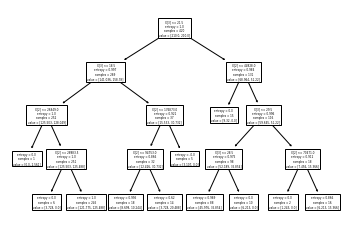

In [25]:
tree.plot_tree(model)

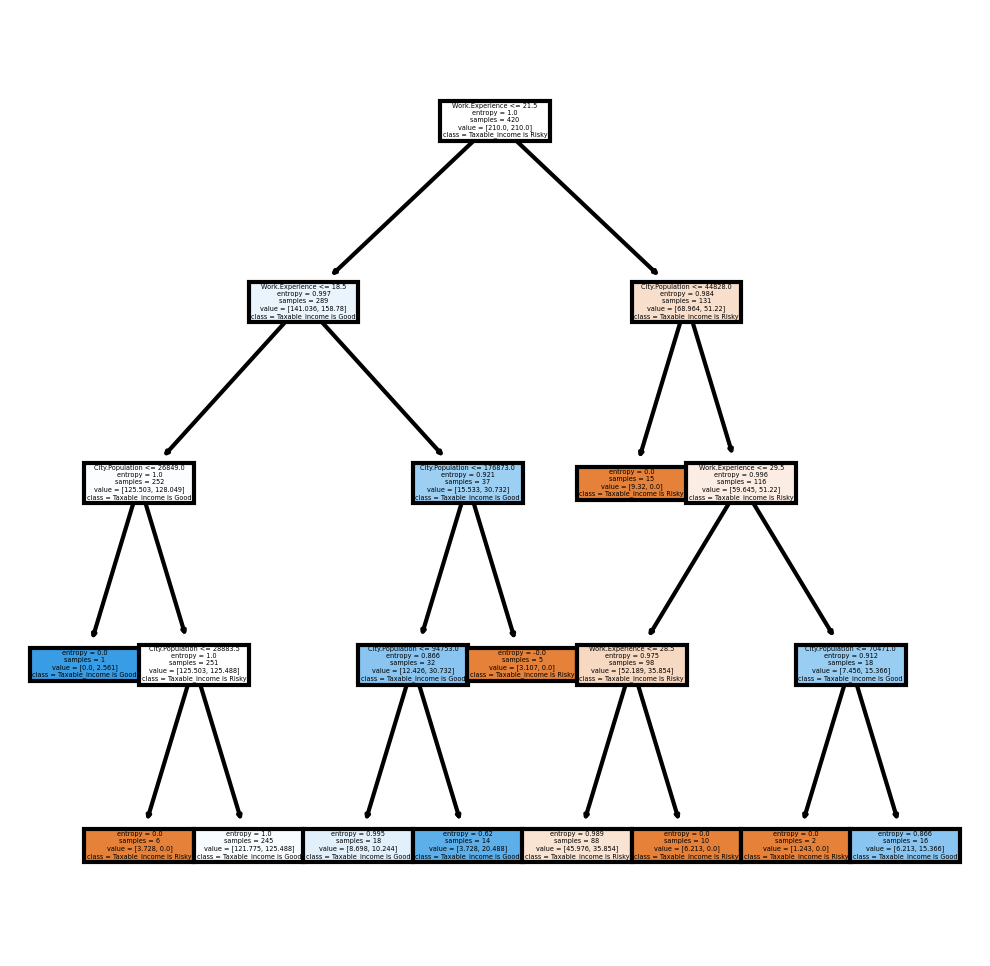

In [26]:
# Plotting the tree diagram using advance techniques

fn = ['Undergrad',	'Marital.Status',	'City.Population',	'Work.Experience',	'Urban']
cn = ['Taxable_income is Risky', 'Taxable_income is Good']
fig,axes = plt.subplots(nrows = 1, ncols =1, figsize =(4,4), dpi = 300)   
tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True);

In [27]:
# Predicting on the test data

prediction = model.predict(x_test)
prediction

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1])

In [28]:
# counting the values on the prediction

pd.Series(prediction).value_counts()

1    130
0     50
dtype: int64

In [29]:
# Creating the crosstable on the basis of the prediction and the test data

crosstable = pd.crosstab(prediction,y_test)
crosstable

TI,0,1
row_0,,
0,38,12
1,100,30


In [30]:
# Calculating the mean  of the data where prediction is equal to the test data i.e accuracy 

round(np.mean(prediction==y_test), 2)

0.38

In [31]:
# classification report of the predictin and the test data

print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.28      0.76      0.40        50
           1       0.71      0.23      0.35       130

    accuracy                           0.38       180
   macro avg       0.49      0.50      0.38       180
weighted avg       0.59      0.38      0.36       180



In [32]:
# Builidng the DecisionTree for the classification problem using the CART method

model_CART_Method = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, class_weight = 'balanced') 

In [33]:
# Creating the model using the cart method

model_CART_Method.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

[Text(167.4, 190.26, 'X[3] <= 21.5\ngini = 0.5\nsamples = 420\nvalue = [210.0, 210.0]'),
 Text(83.7, 135.9, 'X[3] <= 18.5\ngini = 0.498\nsamples = 289\nvalue = [141.036, 158.78]'),
 Text(41.85, 81.53999999999999, 'X[3] <= 11.5\ngini = 0.5\nsamples = 252\nvalue = [125.503, 128.049]'),
 Text(20.925, 27.180000000000007, 'gini = 0.495\nsamples = 149\nvalue = [71.45, 87.073]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.491\nsamples = 103\nvalue = [54.053, 40.976]'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= 176873.0\ngini = 0.446\nsamples = 37\nvalue = [15.533, 30.732]'),
 Text(104.625, 27.180000000000007, 'gini = 0.41\nsamples = 32\nvalue = [12.426, 30.732]'),
 Text(146.475, 27.180000000000007, 'gini = -0.0\nsamples = 5\nvalue = [3.107, 0.0]'),
 Text(251.10000000000002, 135.9, 'X[2] <= 63275.0\ngini = 0.489\nsamples = 131\nvalue = [68.964, 51.22]'),
 Text(209.25, 81.53999999999999, 'X[2] <= 44828.0\ngini = 0.23\nsamples = 28\nvalue = [16.775, 2.561]'),
 Text(188.3

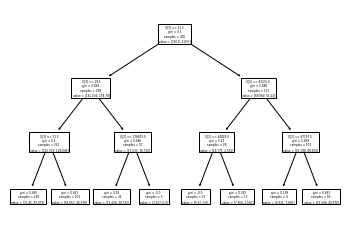

In [35]:
tree.plot_tree(model_CART_Method)

In [36]:
prediction_new = model_CART_Method.predict(x_test)
prediction_new

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0])

In [38]:
# Calculating the mean  of the data where prediction is equal to the test data i.e accuracy 

round(np.mean(prediction_new==y_test),2)

0.46

In [39]:
# calculating the f_1_score of the prediction and the test data

print(f1_score(prediction_new,y_test))

0.2706766917293233


In [41]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
fraud=pd.get_dummies(fraud,columns=['UG','MS','TI'], drop_first=True)
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
fraud["TaxInc"] = pd.cut(fraud["Urban"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
print(fraud)

         CP  WE  Urban  UG_1  MS_1  MS_2  TI_1 TaxInc
0     50047  10      1     0     0     1     0    NaN
1    134075  18      1     1     0     0     0    NaN
2    160205  30      1     0     1     0     0    NaN
3    193264  15      1     1     0     1     0    NaN
4     27533  28      0     0     1     0     0    NaN
..      ...  ..    ...   ...   ...   ...   ...    ...
595   39492   7      1     1     0     0     0    NaN
596   55369   2      1     1     0     0     0    NaN
597  154058   0      1     0     0     0     0    NaN
598  180083  17      0     1     1     0     0    NaN
599  158137  16      0     0     0     0     0    NaN

[600 rows x 8 columns]


# Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [42]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(fraud,columns = ["TaxInc"],drop_first=True)

In [43]:
df.head()

,CP,WE,Urban,UG_1,MS_1,MS_2,TI_1,TaxInc_Good
0,50047,10,1,0,0,1,0,0
1,134075,18,1,1,0,0,0,0
2,160205,30,1,0,1,0,0,0
3,193264,15,1,1,0,1,0,0
4,27533,28,0,0,1,0,0,0


In [44]:
df.tail()

,CP,WE,Urban,UG_1,MS_1,MS_2,TI_1,TaxInc_Good
595,39492,7,1,1,0,0,0,0
596,55369,2,1,1,0,0,0,0
597,154058,0,1,0,0,0,0,0
598,180083,17,0,1,1,0,0,0
599,158137,16,0,0,0,0,0,0


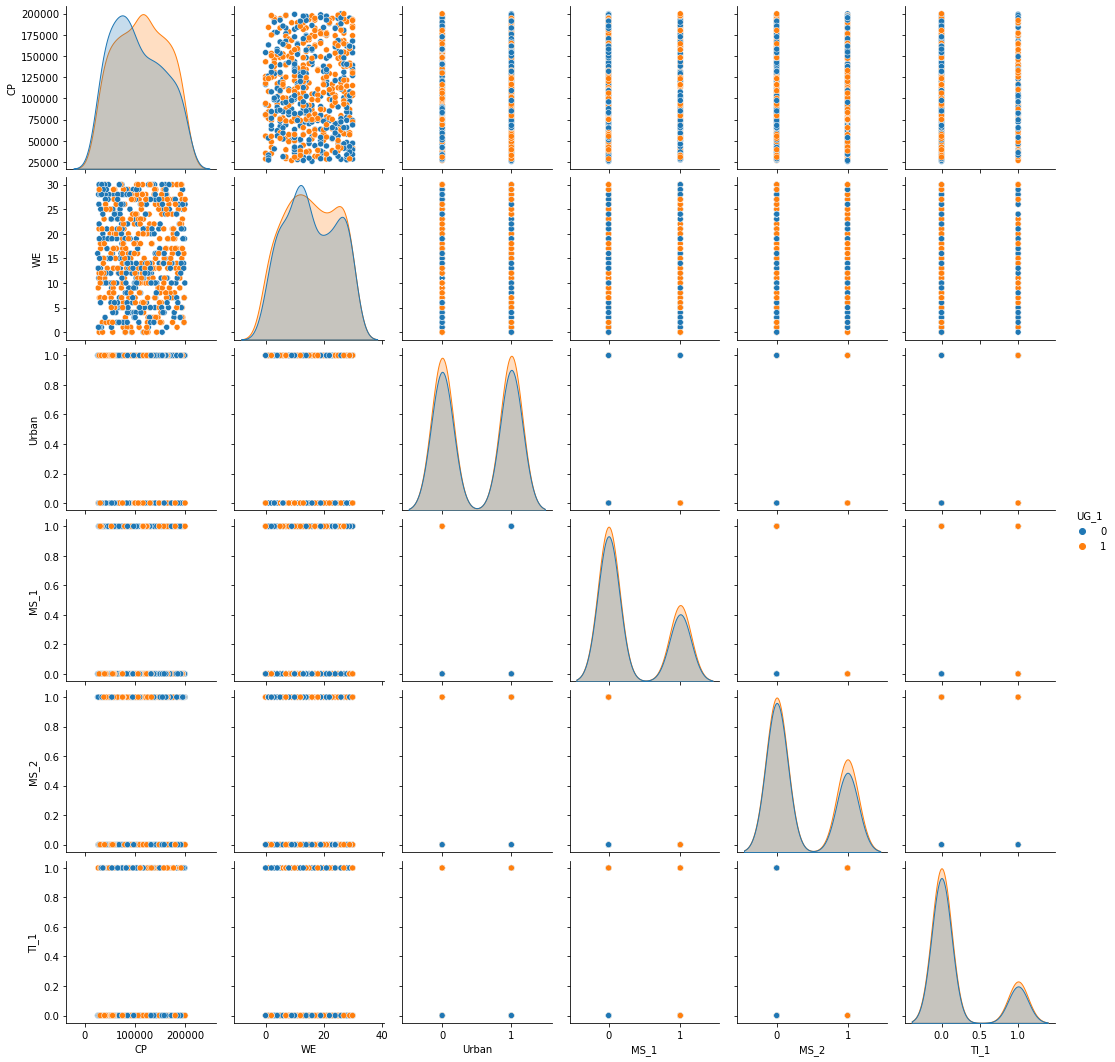

In [45]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=fraud, hue='UG_1')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


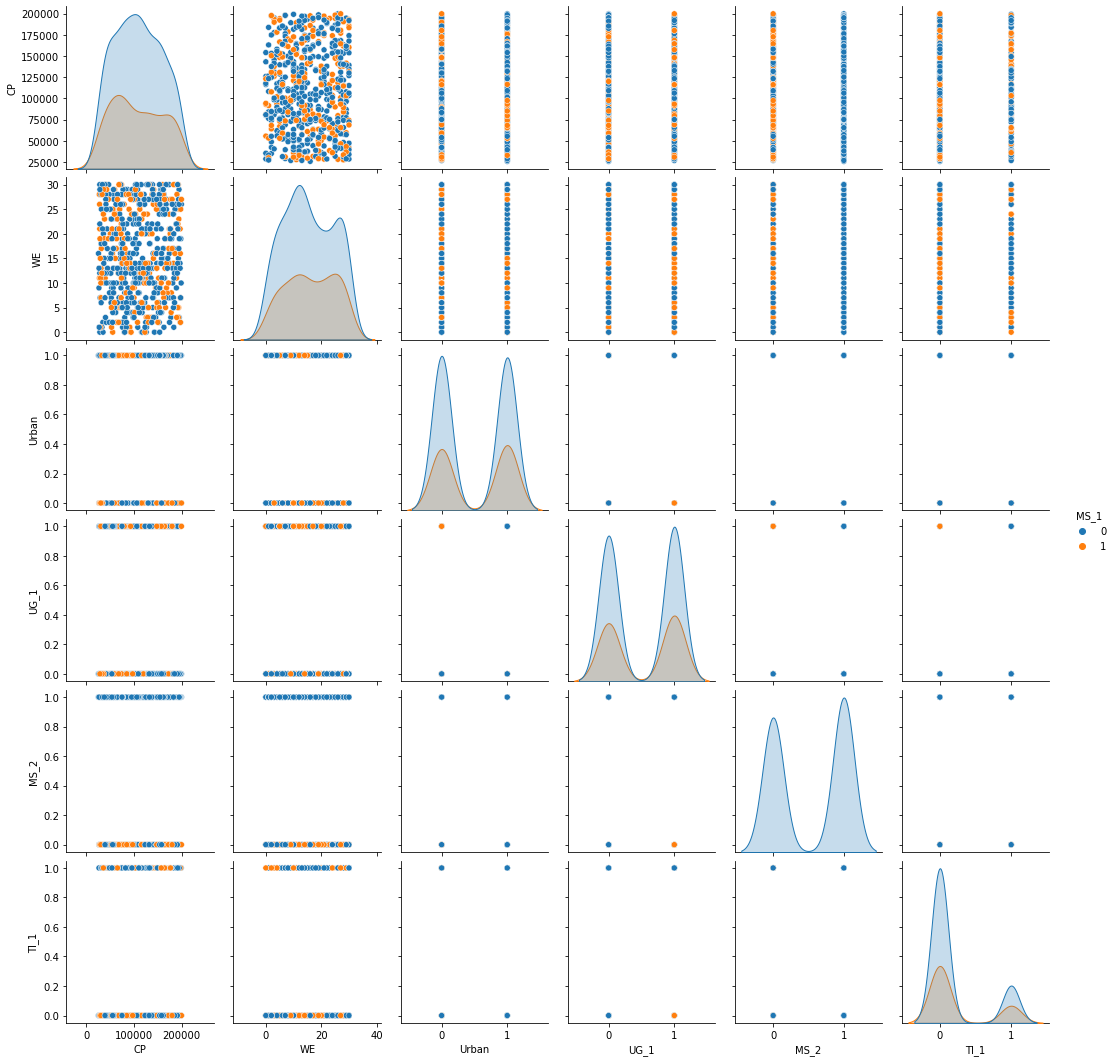

In [46]:
sns.pairplot(data=fraud, hue='MS_1')

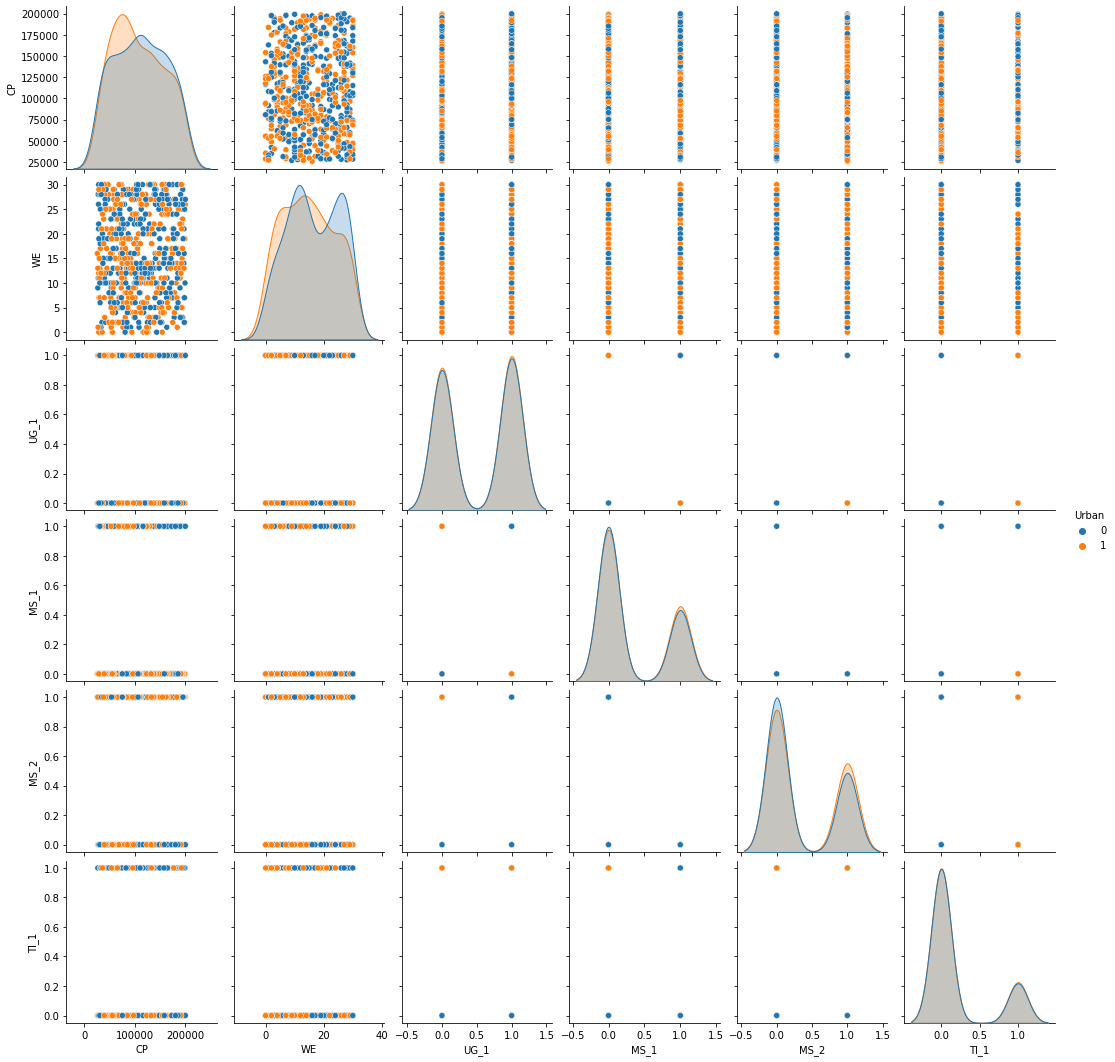

In [48]:
sns.pairplot(data=fraud, hue='Urban')

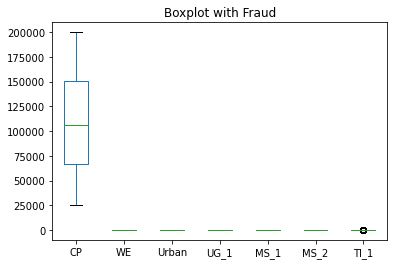

In [49]:
fraud.plot.box(title='Boxplot with Fraud');

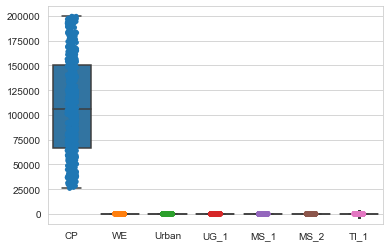

In [50]:
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(data=fraud)
ax = sns.stripplot(data=fraud)

In [51]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

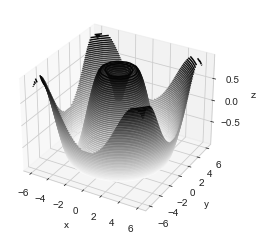

In [52]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [57]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)])
fig.update_layout(title='Mt Bruno Elevation', autosize=False, width=500, height=500, margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [56]:
import plotly.graph_objects as go

import pandas as pd


fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Mt Bruno Elevation', autosize=False, scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64), width=500, height=500,
margin=dict(l=65, r=50, b=65, t=90))

fig.show()

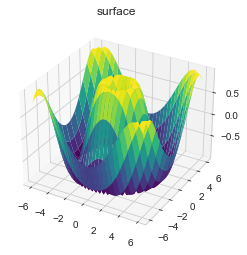

In [55]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=2, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface');